In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# sigmoid로 정말 학습이 잘안되는지 확인하기

In [8]:
## 기타 파라미터 설정
num_iter = 300 # 몇 번 학습시킬지 (컴퓨터 성능에 따라 낮추기 default : 300)
save_freq = 5 # 어떤 주기마다 중간결과 출력할지 (적절히 조절 default : 5)

In [9]:
# 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [10]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (60000, 28, 28)
y_train (60000,)
x_test (10000, 28, 28)
y_test (10000,)


정답: 3


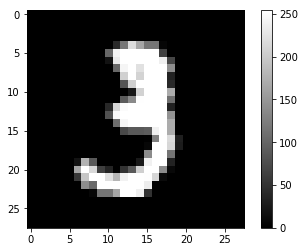

In [12]:
# 데이터 출력
index = 10 # 0~59999 임의의 index 선택

print("정답:", y_train[index]) # 정답 출력

plt.imshow(x_train[index], cmap='gray')
plt.colorbar()

In [13]:
## 기본적인 구조의 CNN (LeCun-5 모델과 유사)
def model_LeCun5(image, act=tf.nn.relu):
    
    C1 = tf.layers.conv2d(inputs=image, filters=6, kernel_size=5,
                         padding='same', activation=act)
    
    S2 = tf.layers.max_pooling2d(C1, pool_size=2, strides=2)
    
    C3 = tf.layers.conv2d(S2, 12, 5, padding='valid', activation=act)
    
    S4 = tf.layers.max_pooling2d(C3, 2, 2)
    
    C5 = tf.layers.conv2d(S4, 120, 5, activation=act)
    
    flatten = tf.layers.flatten(C5)
    
    F6 = tf.layers.dense(flatten, units=84, activation=act)
    output = tf.layers.dense(F6, 10)
    
    print(image)
    print(C1)
    print(S2)
    print(C3)
    print(S4)
    print(C5)
    print(flatten)
    print(F6)
    print(output)
    
    return output

In [15]:
## placeholder와 모델 생성
tf.reset_default_graph()

input_image = tf.placeholder(tf.float32, [None,28,28,1])
label_y = tf.placeholder(tf.int32, [None])


predict_y = model_LeCun5(input_image, act=tf.nn.tanh) # 활성화 함수로 tanh 사용
argmax_y = tf.argmax(predict_y, axis=1) # 가장 큰 값의 index를 리턴해주는 함수

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("conv2d/Tanh:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)
Tensor("conv2d_1/Tanh:0", shape=(?, 10, 10, 12), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 5, 5, 12), dtype=float32)
Tensor("conv2d_2/Tanh:0", shape=(?, 1, 1, 120), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 120), dtype=float32)
Tensor("dense/Tanh:0", shape=(?, 84), dtype=float32)
Tensor("dense_1/BiasAdd:0", shape=(?, 10), dtype=float32)


In [17]:
## loss와 optimizer 정의
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=predict_y, labels=label_y))
opt = tf.train.AdamOptimizer(0.0001)
train_op = opt.minimize(loss)

In [18]:
## 학습1 (activation함수로 tanh사용)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

losses_tanh = []

for iteration in range(num_iter+1):
    indices = np.random.randint(60000,size = 1000)
    batch_x = x_train[indices]
    batch_y = y_train[indices]
    
    batch_x = np.expand_dims(batch_x, axis=-1) # [None,28,28] -> [None,28,28,1]
    
    # 학습 수행
    _ = sess.run(train_op, feed_dict = {input_image:batch_x, label_y:batch_y})
    
    if iteration % save_freq == 0:
        _loss, _argmax = sess.run([loss, argmax_y], feed_dict = {input_image:batch_x, label_y:batch_y})
        losses_tanh.append(_loss)
        print("============== iteration", iteration,"==============")
        print("batch loss", _loss)
        print("예측 5개:", _argmax[:5])
        print("정답 5개", batch_y[:5])

============== iteration 0 ==============
batch loss 2.3055444
예측 5개: [0 1 4 7 6]
정답 5개 [9 0 4 4 1]
============== iteration 5 ==============
batch loss 2.2331016
예측 5개: [8 0 7 6 1]
정답 5개 [7 0 5 2 1]
============== iteration 10 ==============
batch loss 2.150048
예측 5개: [3 8 7 3 7]
정답 5개 [4 7 5 7 5]
============== iteration 15 ==============
batch loss 2.1001782
예측 5개: [0 3 1 1 8]
정답 5개 [5 7 7 1 2]
============== iteration 20 ==============
batch loss 2.0332432
예측 5개: [9 4 7 6 0]
정답 5개 [3 9 7 6 0]
============== iteration 25 ==============
batch loss 1.9637495
예측 5개: [8 6 1 9 0]
정답 5개 [2 5 1 4 0]
============== iteration 30 ==============
batch loss 1.8873603
예측 5개: [8 3 1 0 1]
정답 5개 [2 3 1 0 1]
============== iteration 35 ==============
batch loss 1.817739
예측 5개: [6 4 4 0 3]
정답 5개 [6 4 4 0 3]
============== iteration 40 ==============
batch loss 1.7360026
예측 5개: [9 1 3 9 1]
정답 5개 [5 5 3 9 7]
============== iteration 45 ==============
batch loss 1.6793419
예측 5개: [0 6 0 6 1]
정답 5개 [0 6 0

In [19]:
## 학습2 (activation 함수로 relu 사용)
tf.reset_default_graph()

input_image = tf.placeholder(tf.float32, [None,28,28,1])
label_y = tf.placeholder(tf.int32, [None])

predict_y = model_LeCun5(input_image, act=tf.nn.relu)
argmax_y = tf.argmax(predict_y, axis=1)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=predict_y, labels=label_y))
opt = tf.train.AdamOptimizer(0.0001)
train_op = opt.minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

losses_relu = []

for iteration in range(num_iter+1):
    indices = np.random.randint(60000,size=1000)
    batch_x = x_train[indices]
    batch_y = y_train[indices]
    
    batch_x = np.expand_dims(batch_x, axis=-1) # [None,28,28] -> [None,28,28,1]
    
    # 학습 수행
    _ = sess.run(train_op, feed_dict = {input_image:batch_x, label_y:batch_y})
    
    if iteration % save_freq == 0:
        _loss, _argmax = sess.run([loss, argmax_y], feed_dict = {input_image:batch_x, label_y:batch_y})
        losses_relu.append(_loss)
        print("============== iteration", iteration,"==============")
        print("batch loss", _loss)
        print("예측 5개:", _argmax[:5])
        print("정답 5개", batch_y[:5])

Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)
Tensor("conv2d_1/Relu:0", shape=(?, 10, 10, 12), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 5, 5, 12), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 1, 1, 120), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 120), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 84), dtype=float32)
Tensor("dense_1/BiasAdd:0", shape=(?, 10), dtype=float32)
============== iteration 0 ==============
batch loss 14.027054
예측 5개: [5 0 5 0 5]
정답 5개 [5 8 9 9 0]
============== iteration 5 ==============
batch loss 8.391178
예측 5개: [6 7 9 0 7]
정답 5개 [2 7 7 8 6]
============== iteration 10 ==============
batch loss 5.4212217
예측 5개: [4 6 4 0 3]
정답 5개 [2 6 9 3 8]
============== iteration 15 ==============
batch loss 4.024958
예측 5개: [4 3 6 0 6]
정답 5개 [7 8 2 8 4]
============== iteration 20 ==========

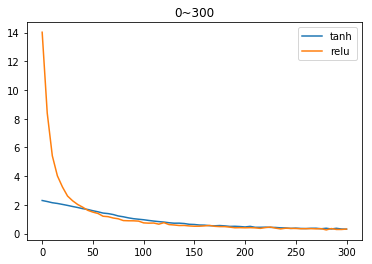

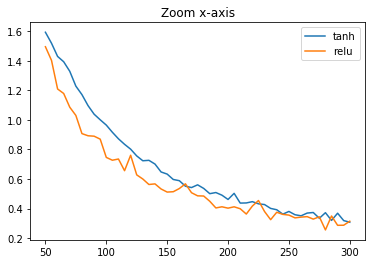

In [20]:
## activation 함수에 따른 학습 경과 비교(tanh, relu)
# 그림 1: 전체 영역을 출력
plt.figure()
plt.title("0~300")
x = np.arange(0, num_iter+1, save_freq)
plt.plot(x, losses_tanh)
plt.plot(x, losses_relu)
plt.legend(['tanh', 'relu'], loc='upper right')
plt.show()

# 그림 2: 초기 학습치는 제거하고, 뒷부분만 확대하여 출력
plt.figure()
plt.title("Zoom x-axis")

skip = 10 # 얼마나 앞부분을 skip할지
x = np.arange(skip*save_freq, num_iter+1, save_freq)
plt.plot(x, losses_tanh[skip:])
plt.plot(x, losses_relu[skip:])
plt.legend(['tanh', 'relu'], loc='upper right')

plt.show()

0~9 숫자별 확률: [[-0.23637916 -0.08604951 -0.1841333  -0.15640578 -0.24018213 -0.31224442
  -0.21504635 -0.1458262  -0.25709966 -0.20117737]]
최종 예측: 1


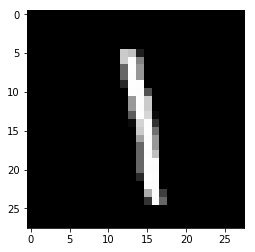

In [25]:
## 테스트 결과 확인
index = 31 # 임의의 index로 변경(0~9999)
test_img = x_test[index]
plt.imshow(test_img, cmap='gray')

# 모델에 입력하기 위해서 4차원으로 확장 ([28,28] -> [N,28,28,1])
test_img = np.expand_dims(test_img, axis=-1) # 맨 뒤에 한 차원 추가
test_img = np.expand_dims(test_img, axis=0) # 맨 앞에 한 차원 추가

# 예측 수행
_predict = sess.run(predict_y, feed_dict={input_image:test_img})
print("0~9 숫자별 확률:", _predict)
print("최종 예측:", np.argmax(_predict))

In [23]:
## 학습3 (activation함수로 sigmoid사용)
tf.reset_default_graph()

input_image = tf.placeholder(tf.float32, [None,28,28,1])
label_y = tf.placeholder(tf.int32, [None])

predict_y = model_LeCun5(input_image, act=tf.nn.sigmoid)
argmax_y = tf.argmax(predict_y, axis=1)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=predict_y, labels=label_y))
opt = tf.train.AdamOptimizer(0.0001)
train_op = opt.minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

losses_sigmoid = []

for iteration in range(num_iter+1):
    indices = np.random.randint(60000,size=1000)
    batch_x = x_train[indices]
    batch_y = y_train[indices]
    
    batch_x = np.expand_dims(batch_x, axis=-1) # [None,28,28] -> [None,28,28,1]
    
    # 학습 수행
    _ = sess.run(train_op, feed_dict = {input_image:batch_x, label_y:batch_y})
    
    if iteration % save_freq == 0:
        _loss, _argmax = sess.run([loss, argmax_y], feed_dict = {input_image:batch_x, label_y:batch_y})
        losses_sigmoid.append(_loss)
        print("============== iteration", iteration,"==============")
        print("batch loss", _loss)
        print("예측 5개:", _argmax[:5])
        print("정답 5개", batch_y[:5])

Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("conv2d/Sigmoid:0", shape=(?, 28, 28, 6), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)
Tensor("conv2d_1/Sigmoid:0", shape=(?, 10, 10, 12), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 5, 5, 12), dtype=float32)
Tensor("conv2d_2/Sigmoid:0", shape=(?, 1, 1, 120), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 120), dtype=float32)
Tensor("dense/Sigmoid:0", shape=(?, 84), dtype=float32)
Tensor("dense_1/BiasAdd:0", shape=(?, 10), dtype=float32)
============== iteration 0 ==============
batch loss 2.5189624
예측 5개: [2 2 2 2 2]
정답 5개 [1 6 2 1 5]
============== iteration 5 ==============
batch loss 2.5234473
예측 5개: [2 2 2 2 2]
정답 5개 [8 9 0 6 6]
============== iteration 10 ==============
batch loss 2.4935117
예측 5개: [2 2 2 2 2]
정답 5개 [6 2 7 4 5]
============== iteration 15 ==============
batch loss 2.463404
예측 5개: [2 2 2 2 2]
정답 5개 [8 0 0 4 2]
============== iteration 

In [24]:
## 나만의 모델 제작
def my_model(image, act=tf.nn.relu):
    
    C1 = tf.layers.conv2d(image, 16, 3, padding='same', activation=act)
    C2 = tf.layers.conv2d(C1, 16, 3, padding='same', activation=act)
    S3 = tf.layers.max_pooling2d(C2, 4, 4)
    
    C4 = tf.layers.conv2d(S3, 32, 3, padding='same', activation=act)
    C5 = tf.layers.conv2d(C4, 32, 3, padding ='same', activation=act)
    S6 = tf.layers.max_pooling2d(C5, 4, 4)
    
    C7 = tf.layers.conv2d(S6, 120, 5, padding='same', activation=act)
    C8 = tf.layers.conv2d(C7, 120, 5, padding='same', activation=act)
    
    flatten = tf.layers.flatten(C8)
    print(flatten)
    
    F9 = tf.layers.dense(flatten, 64, activation=act)
    output = tf.layers.dense(F9, 10)
    
    return output

In [ ]:
tf.reset_default_graph()

input_image = tf.placeholder(tf.float32, [None,28,28,1])
label_y = tf.placeholder(tf.int32, [None])

predict_y = my_model(input_image, act=tf.nn.relu)
argmax_y = tf.argmax(predict_y, axis=1)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=predict_y, labels=label_y))
opt = tf.train.AdamOptimizer(0.0001)
train_op = opt.minimize(loss)